Welcome to the new episode of ML4S. Here we will discuss the second model enhacement technique which is variable selection. Basically, Using all predictors is not always the optimal solution. In many cases, using less predictors is better for the overall performace. There are three ways to choose our predictors in a way such that the perfromace of our model is maximized.



1.   Filter Methods



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for this notebook we will use the boston housing dataset. <br>
CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town. <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per 10,000 dollars. <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population <br>
MEDV - Median value of owner-occupied homes in $1000's <br>

Target  = MEDV


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML4S/Datasets/boston.csv')
df = df.drop(columns= ['Unnamed: 0'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


The filter method is as straighforwad as it gets. All you need to do is to find the correlation coefficient between each predictor and the target variable then filter out predictors with a correlation (r) less than 0.5 (abs value).

Quick Reminder:
The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation
<br> <br>
and one more thing, R donates correlation coefficient. I hope this helps you understand what R-squared actually is :D

In [ ]:
cor = df.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Ehhh hard to read right? lets use a heatmap

<Axes: >

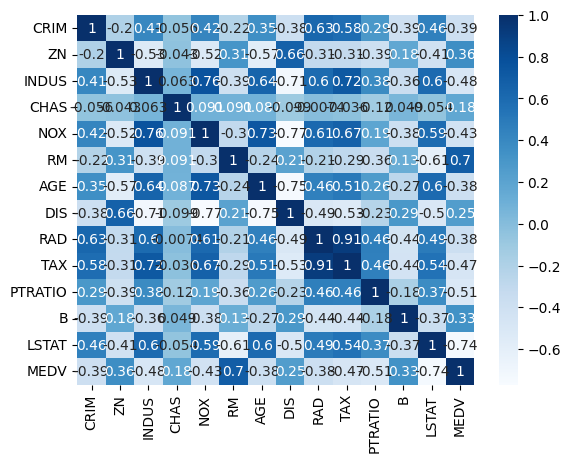

In [ ]:
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

ouch very ugly, lets fix this using matplotlib.

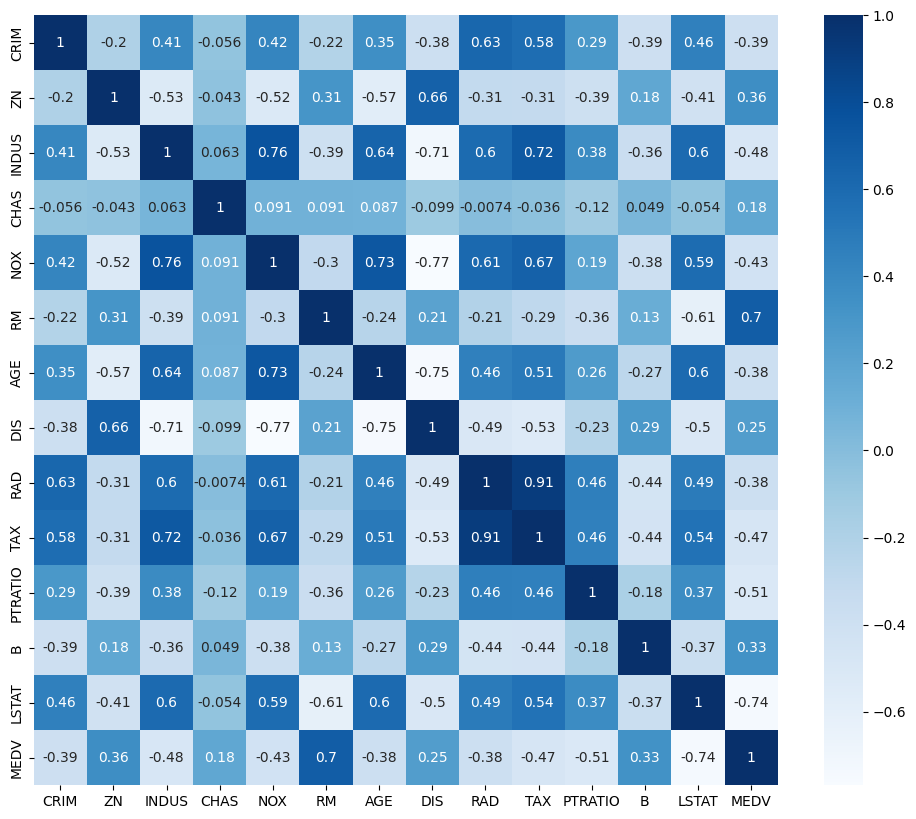

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Focusing on the very last row here. We can see that some variabes are not that correlated with the target variable (MEDV). This does not exactly mean there is no correlation between the predictor and the target (maybe the correlation is between the predictor squared and the target) but this changes the regression into non-linear which we will discuss later. For now, we will rule uncorrelated variables out.

In [ ]:
cor_target = abs(cor["MEDV"]) #taking the absolute correlation values for MEDV only
relevant_features = cor_target[cor_target>0.5] #keeping those with corr above .5
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

Alright wow, our 13 features are 3 now only. lets drop out the irrelevant variables.

In [ ]:
relevant = ['RM', 'PTRATIO', 'LSTAT', 'MEDV']
for i in df.columns:
  if i not in relevant: ###appreciate python
    df = df.drop(columns = [i])
df

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


Are we done? No. Something is missing. We have to verify that these predictors are independent. Why? two reasons:

1.   It would be useless to have dependent variables. It is like asking the king if he is rich, ofc he is because social status and income are highly correlated. Having one of them as a predictor is more than enough. Having both is considered unethical as you are directing your model towards a specfic direction. <br>

fun fact: the dataset we are using now is considered unethical for a similar reason. try importing it from an offical source (fade7a)

`from sklearn.datasets import load_boston` <br>
`df = load_boston`

now lets speak mathematically. <br>

2.   Linear regression is based on 5 assumptions. If those assumptions are not satisfied then our regression is not valid but we will discuss this further at the end. What we need to know for now is that intra-independance is one of them. If you want to have a small intro about it here is a short article.

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/








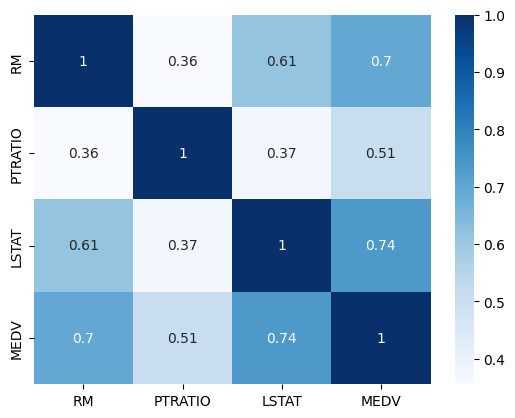

In [ ]:
cor = df.corr()
sns.heatmap(abs(cor), annot=True, cmap=plt.cm.Blues) #I used the absolute values cuz its easier
plt.show()

As we can see, LSTAT and RM are highly correlated (0.61). Hence, we have to drop one of them. Always keep the one with a higher correlation with the target variable. Here, RM has r = 0.7 while LSTAT has r = 0.74. So we will keep LSTAT.

In [ ]:
df = df.drop(columns = ['RM'])

This is the filter method.



2.   Wrapper method



The wrapper method is a more basic idea to choose variables. It has two variations, backward elimination or forward elimination. <br>

backward elimination works as follows:

*   Use all predictors to build a regression model.
*   iteratively remove the worst performing predictor.
*   keep going until removing is no longer useful



A good question is how do we evaluate predictors performace? There are many ways to do so by hand but we will utilize the p-values theory. If you ever studied statistics you have definetaly came across a table full of pre-computed numbers at the end of the book. The theory of it is out of our scope so we will just focus on how we can make use of it. The rule is simple:

***If the P-value is above 0.05 then we remove the feature, else we keep it.***

we will use a stats lib to calculate the p-values for us.

Unfortunatly Sklearn does not provide an easy method to use p-values. Hence, we will use another library which is statsmodels.

In [ ]:
import statsmodels.api as sm
#lets get a fresh version of the dataset.
df = pd.read_csv('/content/drive/MyDrive/ML4S/Datasets/boston.csv')
df = df.drop(columns= ['Unnamed: 0'])

#Split into predictors and a target.
X = df.drop(columns = ['MEDV'])
y = df['MEDV']

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

We can see that AGE has a 0.9 P-value. Hence, we should drop it.

Note that even though there are other variables with a p-value above 0.5, we cannot drop more than one variable at a time.

Lets do this procedure in a loop to save time. I have taken this loop from the internet but it is easy to understand




In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


These are the remaining variables.

Recursive Feature Elimination (RFE) works in the opposite direction. We use the most important feature alone with the target, then we keep adding features and evaluate the model until the evaluation metric is maximized.

In [ ]:
#Recursive Feature Elimination (RFE) A.K.A. forward elimination
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True False False  True False
  True]
[3 5 4 1 1 1 8 1 2 6 1 7 1]


the true and false shows whether a feature is relevant or not.
the numbers show how important is it (ranking). Now here is a loop to do this for you.

In [ ]:
#no of features
nof_list=np.arange(1,13)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


Now we can just fit these selected features to our regression model

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select = 10)   #from the results we obtained
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)

## if want to see which features are those we can read them like this
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

#this seems a bit unfamiliar because sklearn store results as pandas series and not a dataframe
#however it is totally fine to use these codes as black boxes. taken from sklearn manual.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


3- Advanced statistical tests.

More advanced tests are available as well. Mainly Lasso tests.
Lasso regularization checks if the feature is irrelevant then penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken. This is done iteratively. Again, there is no need to understand the math behind it as we are focusing on practical ML. We care about knowing these tools, utilizing them, and interpreting the outcomes.

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


We can also plot the Lasso importance value for all variables.

Text(0.5, 1.0, 'Feature importance using Lasso Model')

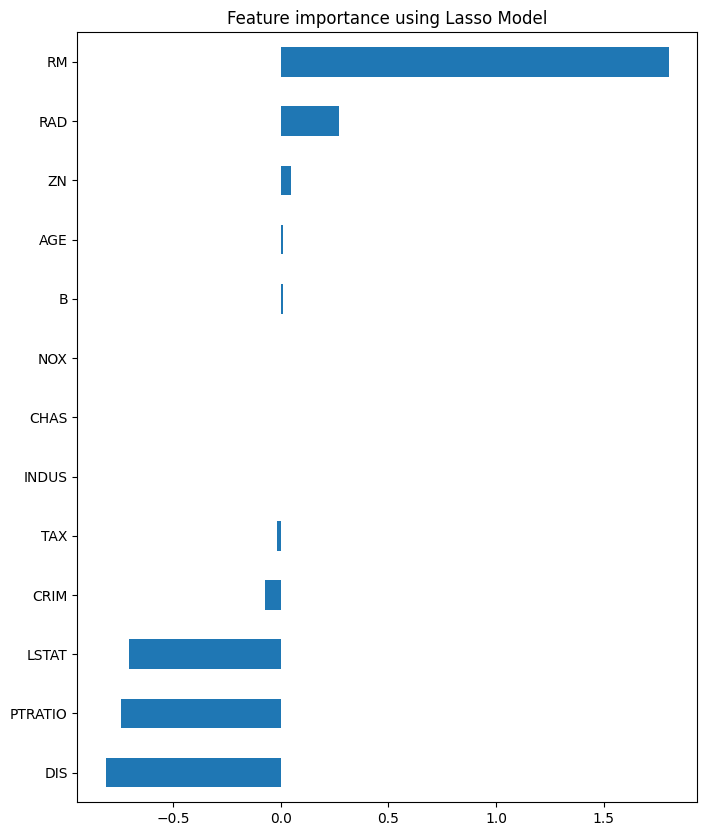

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken all the features except NOX, CHAS and INDUS.

Practice Problem:

Note: The data in this problem is REAL-WORLD data collected by the Worlds Health Organization (WHO). Hence, it is difficult but I believe that you are ready to take on real-world datasets. The target variable in this dataset is the life expectancy variable.

1.   Read the dataset from google drive. The cell is written for you.
2.   Clean the dataset from categorical data.
3.   Use the z-score to remove outliers. (Hint: no it is not empty.)
4.   plot the scatter plot of the target variable. Does a linear model seem to be a good solution? (Hint: df.columns)
5.   Fit the data and evaluate the regression model using MSE and R-squared.
6.   read the data again but this time use filtering method for feature selection.
7.   Print out the variables selected. (Hint: 1 variables)
8.   Run regression with the selected variables.
9.  Jordan has the following records in 2022. What is the life expectancy in Jordan last year? (Hint: life expectancy is positive)

  `jordan = [0.7]`<br>
`sample = np.array(jordan).reshape(1,-1)` <br>
10.   test again using backware eliminaition. Evaluate.
11.  test again using Lasso method. Evaluate. (Hint: sklearn transform converts X to numpy, just read it again as a dataframe after fitting)
12.  Which feature(s) was/ere dropped by lasso?



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/drive/MyDrive/ML4S/Datasets/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
#Clean dataset from categorical variables
df = df.drop(columns = ['Country', 'Status'])

In [5]:
#Check if we have nulls
print(df.isnull().sum())

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
#Drop the rows that contain null values
df = df.dropna()

In [7]:
#Use z-score to remove outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

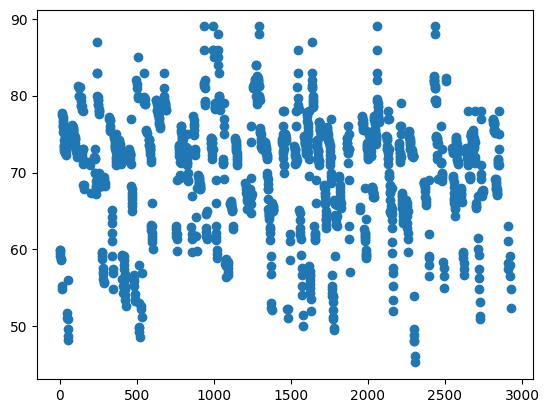

In [8]:
#Plotting the scatter plot of Life expectancy
plt.scatter(df.index, df['Life expectancy '])

In [ ]:
# Plot all the variables against Life expectancy
predictor_columns = df.columns[df.columns != 'Life expectancy ']
for column in predictor_columns:
    plt.scatter(df[column], df['Life expectancy '])
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.show()

In [9]:
# Split the data into predictors (X) and target (y)
X = df.drop(columns = ['Life expectancy ']) # Drop all columns except Life expectancy
y = df['Life expectancy ']

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
regressor = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

R-squared score: 0.8646161189192627
MSE:  9.405056618617142


<Axes: xlabel='Life expectancy '>

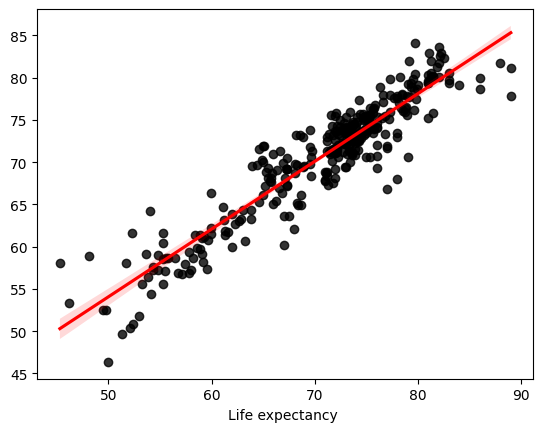

In [ ]:
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [16]:
df = pd.read_csv('/content/drive/MyDrive/ML4S/Datasets/Life Expectancy Data.csv')

#Clean dataset from categorical variables
df = df.drop(columns = ['Country', 'Status'])

#Drop the rows that contain null values
df = df.dropna()

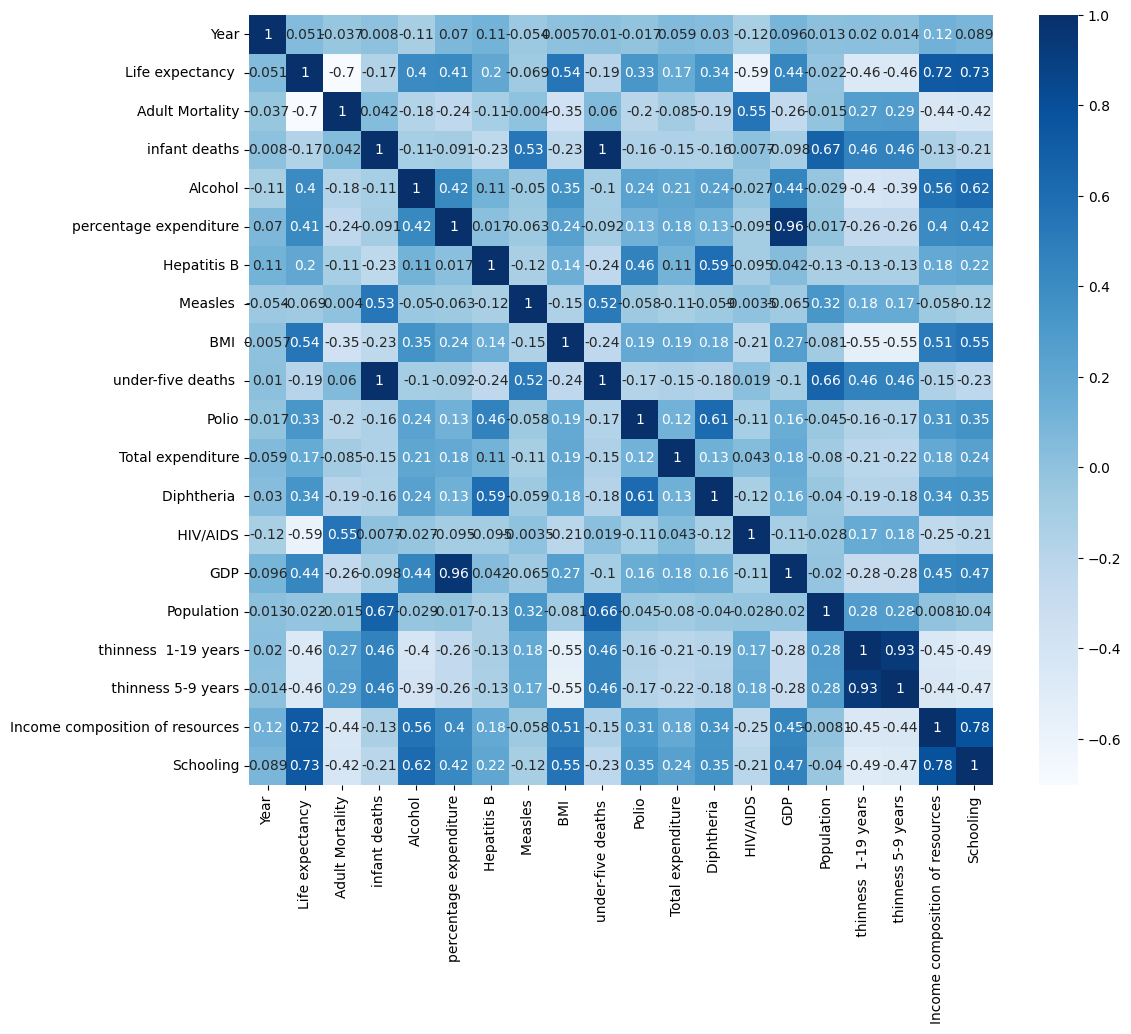

In [17]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [18]:
cor_target = abs(cor["Life expectancy "]) #taking the absolute correlation values for MEDV only
relevant_features = cor_target[cor_target>0.5] #keeping those with corr above .5
relevant_features

Life expectancy                    1.000000
Adult Mortality                    0.702523
 BMI                               0.542042
 HIV/AIDS                          0.592236
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy , dtype: float64

In [20]:
relevant = ['Adult Mortality', ' BMI ', ' HIV/AIDS', 'Income composition of resources','Schooling','Life expectancy ']
for i in df.columns:
  if i not in relevant:
    df = df.drop(columns = [i])

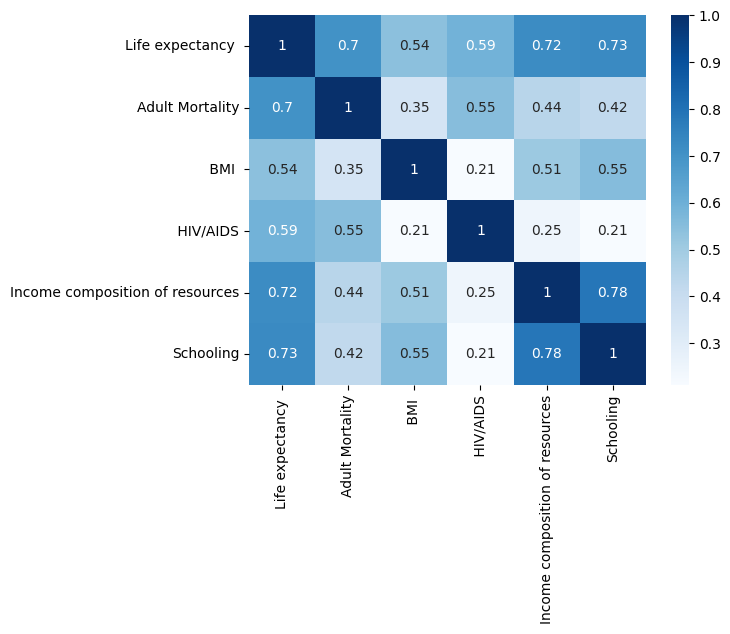

In [21]:
cor = df.corr()
sns.heatmap(abs(cor), annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
df

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,65.0,263.0,19.1,0.1,0.479,10.1
1,59.9,271.0,18.6,0.1,0.476,10.0
2,59.9,268.0,18.1,0.1,0.470,9.9
3,59.5,272.0,17.6,0.1,0.463,9.8
4,59.2,275.0,17.2,0.1,0.454,9.5
...,...,...,...,...,...,...
2933,44.3,723.0,27.1,33.6,0.407,9.2
2934,44.5,715.0,26.7,36.7,0.418,9.5
2935,44.8,73.0,26.3,39.8,0.427,10.0
2936,45.3,686.0,25.9,42.1,0.427,9.8


In [ ]:
#Schooling and Income composition of resources are highly correlated
#Drop th eone with lower correlation with our predictor variable
df = df.drop(columns = ['Income composition of resources'])

In [ ]:
df

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Schooling
0,65.0,263.0,19.1,0.1,10.1
1,59.9,271.0,18.6,0.1,10.0
2,59.9,268.0,18.1,0.1,9.9
3,59.5,272.0,17.6,0.1,9.8
4,59.2,275.0,17.2,0.1,9.5
...,...,...,...,...,...
2933,44.3,723.0,27.1,33.6,9.2
2934,44.5,715.0,26.7,36.7,9.5
2935,44.8,73.0,26.3,39.8,10.0
2936,45.3,686.0,25.9,42.1,9.8


In [ ]:
# Split the data into predictors (X) and target (y)
X = df.drop(columns = ['Life expectancy ']) # Drop all columns except Life expectancy
y = df['Life expectancy ']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
regressor = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

      Adult Mortality   BMI    HIV/AIDS  Schooling
359             158.0    5.3        0.1       13.3
117              64.0   63.9        0.1       19.5
1639             62.0   67.6        0.1       14.6
784             188.0   44.1        2.5       12.3
2204            139.0   72.9        0.1       12.9
...               ...    ...        ...        ...
2429             63.0   64.1        0.1       16.9
342             393.0   34.7        9.0       12.2
10              291.0   14.2        0.1        7.9
1641             64.0   66.6        0.1       14.6
2251            196.0   23.2        0.3        8.7

[413 rows x 4 columns]
[[0.21745152 0.04394141 0.         0.55151515]
 [0.08725762 0.82423435 0.         0.92727273]
 [0.08448753 0.873502   0.         0.63030303]
 ...
 [0.40166205 0.16245007 0.         0.22424242]
 [0.08725762 0.86018642 0.         0.63030303]
 [0.2700831  0.28229028 0.0039604  0.27272727]]
R-squared score: 0.8056778632594568
MSE:  14.549432906332598


<Axes: xlabel='Life expectancy '>

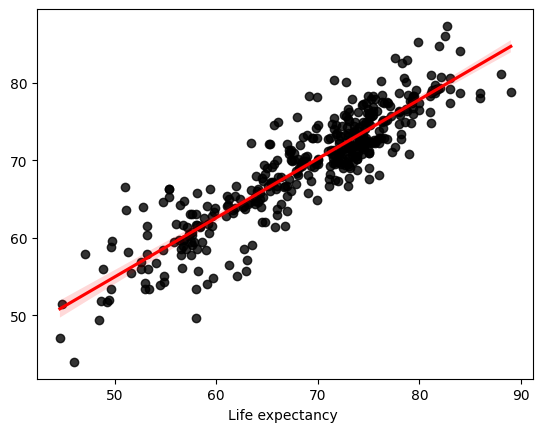

In [ ]:
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [ ]:
jordan = [112, 65.7, 0.1, 13.9]
sample = np.array(jordan).reshape(1,-1)

prediction = model.predict(sample)
prediction = abs(prediction)

print("life expectancy in Jordan last year:", prediction)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/Life Expectancy Data.csv')

#Clean dataset from categorical variables
df = df.drop(columns = ['Country', 'Status'])

#Drop the rows that contain null values
df = df.dropna()

#Split into predictors and a target.
X = df.drop(columns = ['Life expectancy '])
y = df['Life expectancy ']

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                               1.757403e-11
Year                                2.217833e-08
Adult Mortality                     1.211399e-62
infant deaths                       1.247685e-16
Alcohol                             1.722971e-03
percentage expenditure              8.318056e-02
Hepatitis B                         6.004840e-01
Measles                             3.016831e-01
 BMI                                1.392145e-07
under-five deaths                   1.019579e-17
Polio                               2.699239e-01
Total expenditure                   1.767541e-02
Diphtheria                          2.151454e-02
 HIV/AIDS                          9.049742e-119
GDP                                 2.965407e-01
Population                          7.070306e-01
 thinness  1-19 years               9.654250e-01
 thinness 5-9 years                 3.066755e-01
Income composition of resources     1.470148e-34
Schooling                           9.315883e-50
dtype: float64

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', ' BMI ', 'under-five deaths ', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
relevant = ['Life expectancy ', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', ' BMI ', 'under-five deaths ', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
for i in df.columns:
  if i not in relevant:
    df = df.drop(columns = [i])

In [ ]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,19.1,83,8.16,65.0,0.1,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,18.6,86,8.18,62.0,0.1,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,18.1,89,8.13,64.0,0.1,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,17.6,93,8.52,67.0,0.1,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,17.2,97,7.87,68.0,0.1,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,27.1,42,7.13,65.0,33.6,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,26.7,41,6.52,68.0,36.7,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,26.3,40,6.53,71.0,39.8,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,25.9,39,6.16,75.0,42.1,1.7,0.427,9.8


In [ ]:
# Split the data into predictors (X) and target (y)
X = df.drop(columns = ['Life expectancy ']) # Drop all columns except Life expectancy
y = df['Life expectancy ']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
regressor = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

R-squared score: 0.8357541377899669
MSE:  12.297539500393132


<Axes: xlabel='Life expectancy '>

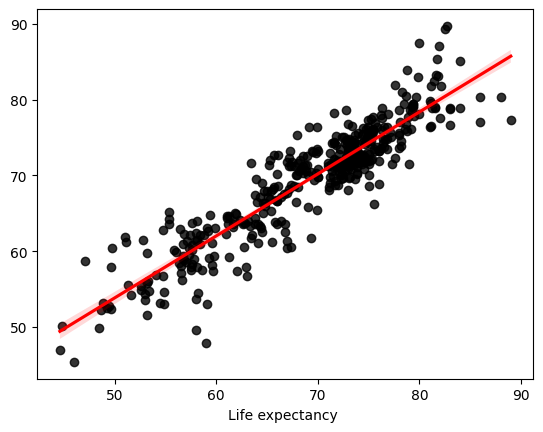

In [ ]:
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [ ]:
jordan = [112, 65.7, 0.1, 13.9]
sample = np.array(jordan).reshape(1,-1)

prediction = model.predict(sample)
prediction = abs(prediction)

print("life expectancy in Jordan last year:", prediction)

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

#Clean dataset from categorical variables
df = df.drop(columns = ['Country', 'Status'])

#Drop the rows that contain null values
df = df.dropna()

In [ ]:
from sklearn.linear_model import LassoCV, Lasso
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 17 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

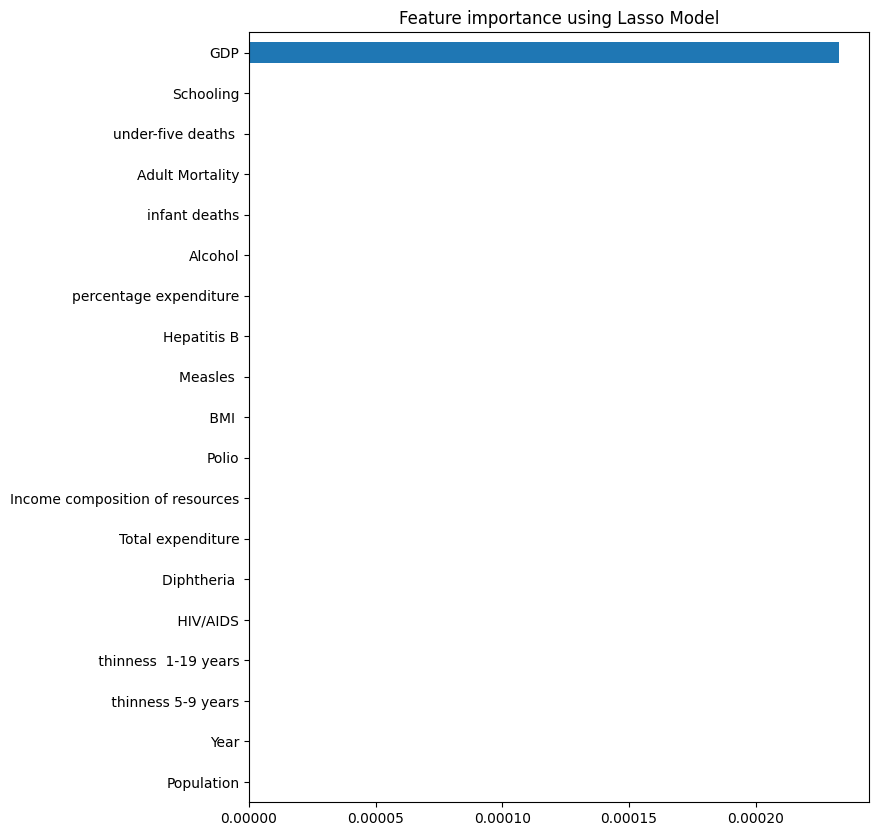

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")